In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
carprice = pd.read_csv(r"E:\PYTHON\SEMESTER-6\APPLICATION OF ML IN INDUSTRIES\CarPrice.csv")

carprice.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [4]:
carprice[['CarName','Model']] = pd.DataFrame(carprice.CarName.str.split(" ",1).tolist(),columns = ['CarName','Model'])

In [5]:
carprice.CarName.replace({'maxda':'mazda','porcsche':'porsche','vokswagen':'volkswagen','vw':'volkswagen','Nissan':'nissan','toyouta':'toyota'},inplace = True)

In [6]:
carprice['doornumber'] = carprice.doornumber.map({'four':4,'two':2})

In [7]:
carprice['cylindernumber'] = carprice.cylindernumber.map({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12})

In [8]:
fueltype = pd.get_dummies(carprice['fueltype'],drop_first=True)
carprice = pd.concat([carprice,fueltype],axis=1)

In [9]:
carprice.drop(['fueltype'],axis=1,inplace=True)
aspiration = pd.get_dummies(carprice['aspiration'],drop_first=True)
carprice = pd.concat([carprice,aspiration],axis=1)
carprice.drop(['aspiration'],axis = 1,inplace=True)

In [10]:
enginelocation = pd.get_dummies(carprice['enginelocation'],drop_first=True)
carprice = pd.concat([carprice,enginelocation],axis=1)
carprice.drop(['enginelocation'],axis=1,inplace=True)
mancode = pd.get_dummies(carprice['CarName'])
carprice = pd.concat([carprice,mancode],axis=1)
carprice.drop(['CarName'],axis=1,inplace=True)

carbody = pd.get_dummies(carprice['carbody'],drop_first=True)
carprice = pd.concat([carprice,carbody],axis=1)
carprice.drop(['carbody'],axis=1,inplace=True)

enginetype = pd.get_dummies(carprice['enginetype'],drop_first=True)
carprice = pd.concat([carprice,enginetype],axis=1)
carprice.drop(['enginetype'],axis=1,inplace=True)

In [11]:
fuelsystem = pd.get_dummies(carprice['fuelsystem'],drop_first=True)
carprice = pd.concat([carprice,fuelsystem],axis=1)
carprice.drop(['fuelsystem'],axis=1,inplace=True)

drivewheel = pd.get_dummies(carprice['drivewheel'],drop_first=True)
carprice = pd.concat([carprice,drivewheel],axis=1)
carprice.drop(['drivewheel'],axis=1,inplace=True)

carprice.drop(['Model'],axis=1,inplace=True)
carprice.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,fwd,rwd
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,1,0,0,0,1
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,1,0,0,0,1
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,1,0,0,0,1
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,1,0,0,1,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,1,0,0,0,0


In [12]:
df_train,df_test = train_test_split(carprice,train_size=0.7,random_state=100)
scaler = MinMaxScaler()

In [13]:
num_vars = ['doornumber','cylindernumber','wheelbase','carlength','carwidth','carheight',
'curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [14]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            143 non-null    int64  
 1   symboling         143 non-null    int64  
 2   doornumber        143 non-null    float64
 3   wheelbase         143 non-null    float64
 4   carlength         143 non-null    float64
 5   carwidth          143 non-null    float64
 6   carheight         143 non-null    float64
 7   curbweight        143 non-null    float64
 8   cylindernumber    143 non-null    float64
 9   enginesize        143 non-null    float64
 10  boreratio         143 non-null    float64
 11  stroke            143 non-null    float64
 12  compressionratio  143 non-null    float64
 13  horsepower        143 non-null    float64
 14  peakrpm           143 non-null    float64
 15  citympg           143 non-null    float64
 16  highwaympg        143 non-null    float64
 1

In [15]:
y_train = df_train.pop('price')
X_train = df_train

In [16]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [17]:
rfe = RFE(lm,n_features_to_select=10)


In [18]:
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'rear', 'bmw', 'peugeot', 'dohcv'],
      dtype='object')

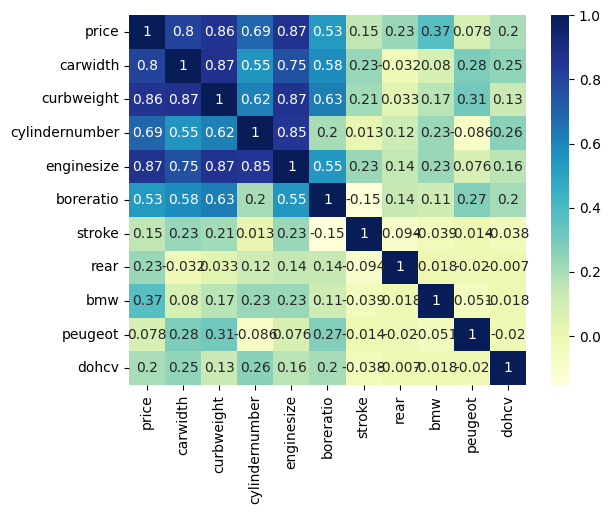

In [19]:
df_corr = pd.concat([y_train,X_train[col]],axis=1)
plt.Figure(figsize=(16,10))
sns.heatmap(df_corr.corr(),annot = True,cmap='YlGnBu')
plt.show()

In [20]:
X_train_rfe = X_train[['carwidth','curbweight','enginesize','bmw','rear']]
X_train_new = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train).fit()

In [21]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     55.07
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.73e-49
Time:                        23:59:35   Log-Likelihood:                 272.80
No. Observations:                 143   AIC:                            -433.6
Df Residuals:                      87   BIC:                            -267.7
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID               0.0031      0.002  

In [22]:
vif = pd.DataFrame()
X = X_train_new
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Feature,VIF
0,const,7.74
2,curbweight,7.26
1,carwidth,4.40
3,enginesize,4.35
4,bmw,1.09
5,rear,1.08


In [23]:
X_train_new.drop(['curbweight'],axis=1,inplace=True)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()


In [24]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.3
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.18e-61
Time:                        23:59:35   Log-Likelihood:                 166.60
No. Observations:                 143   AIC:                            -323.2
Df Residuals:                     138   BIC:                            -308.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1868      0.018    -10.496      0.0

In [25]:
vif = pd.DataFrame()
X = X_train_new
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Feature,VIF
0,const,7.67
2,enginesize,2.68
1,carwidth,2.50
3,bmw,1.09
4,rear,1.08
